In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [5]:
import plotly.express as px

In [6]:
df = pd.read_csv('all_data_no_duplicates_no_nan.csv', index_col=0)

In [7]:
df.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
song_id,,,,,,,,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,-229.50793,165.34088,-7.086333,40.653236,21.612593,10.455354,2.519586,2.451797,-3.991856,-4.324726,...,1.371483,1.464422,107.666016,2.049022,6.809770,0.325403,1.186977,14.577969,8.571882,blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-152.97127,187.31133,-24.013628,36.722843,-7.629228,7.993011,0.122216,9.018068,-4.820596,15.190435,...,1.563161,1.532488,107.666016,1.219732,1.863686,-0.185727,-0.053225,14.237181,8.395347,blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-108.80943,130.35703,-40.753914,57.989124,-32.169636,29.431482,-2.901658,10.708194,-5.848942,28.494379,...,1.383776,0.885813,114.843750,0.731147,0.105860,0.162505,-0.303242,14.258918,8.342572,blues
6d12adc4a57955aea80caa0f6b81b71c6301788e,-211.29941,188.12619,-9.946309,32.445030,20.394655,22.343174,-3.353201,12.316050,4.950298,5.162346,...,1.335705,1.347955,135.999178,2.226300,7.146918,-0.409219,0.747511,14.303135,8.386653,blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-137.08119,142.74070,-44.772590,55.344696,2.729026,31.821533,-3.522485,9.911481,2.599337,6.731053,...,1.542062,1.281024,132.512019,2.425881,8.324231,0.821095,2.731135,14.626939,8.361398,blues


In [8]:
X = df.drop('genre', axis=1)
y = df['genre']

In [9]:
X.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
song_id,,,,,,,,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,-229.50793,165.34088,-7.086333,40.653236,21.612593,10.455354,2.519586,2.451797,-3.991856,-4.324726,...,0.025127,1.371483,1.464422,107.666016,2.049022,6.809770,0.325403,1.186977,14.577969,8.571882
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-152.97127,187.31133,-24.013628,36.722843,-7.629228,7.993011,0.122216,9.018068,-4.820596,15.190435,...,0.014338,1.563161,1.532488,107.666016,1.219732,1.863686,-0.185727,-0.053225,14.237181,8.395347
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-108.80943,130.35703,-40.753914,57.989124,-32.169636,29.431482,-2.901658,10.708194,-5.848942,28.494379,...,0.026403,1.383776,0.885813,114.843750,0.731147,0.105860,0.162505,-0.303242,14.258918,8.342572
6d12adc4a57955aea80caa0f6b81b71c6301788e,-211.29941,188.12619,-9.946309,32.445030,20.394655,22.343174,-3.353201,12.316050,4.950298,5.162346,...,0.026476,1.335705,1.347955,135.999178,2.226300,7.146918,-0.409219,0.747511,14.303135,8.386653
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-137.08119,142.74070,-44.772590,55.344696,2.729026,31.821533,-3.522485,9.911481,2.599337,6.731053,...,0.046795,1.542062,1.281024,132.512019,2.425881,8.324231,0.821095,2.731135,14.626939,8.361398


In [10]:
len(X.columns)

79

<AxesSubplot:>

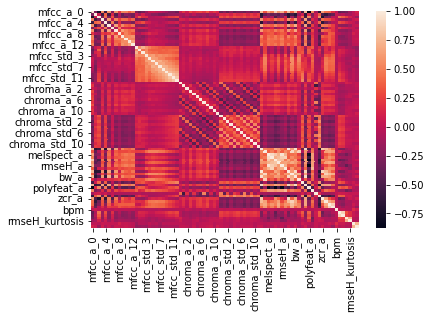

In [11]:
sns.heatmap(X.corr())

## Normalize Data

In [12]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
X_scaled

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
0,0.720044,0.537168,0.415077,0.546522,0.608724,0.471041,0.539956,0.456838,0.431799,0.421460,...,0.253171,0.380552,0.279490,0.335106,0.202542,0.048464,0.325090,0.067533,0.863221,0.958151
1,0.840586,0.672186,0.329867,0.517902,0.345097,0.439374,0.501134,0.552778,0.417084,0.762468,...,0.136607,0.470546,0.296617,0.335106,0.115681,0.018041,0.244969,0.038175,0.811358,0.906720
2,0.910139,0.322177,0.245597,0.672756,0.123856,0.715080,0.452168,0.577473,0.398824,0.994941,...,0.266957,0.386323,0.133901,0.397163,0.064506,0.007228,0.299555,0.032257,0.814666,0.891345
3,0.748721,0.677194,0.400680,0.486753,0.597743,0.623922,0.444856,0.600965,0.590582,0.587237,...,0.267752,0.363754,0.250185,0.580067,0.221111,0.050538,0.209935,0.057130,0.821395,0.904187
4,0.865612,0.398280,0.225368,0.653500,0.438481,0.745817,0.442115,0.565832,0.548837,0.614649,...,0.487287,0.460640,0.233344,0.549918,0.242015,0.057780,0.402792,0.104086,0.870673,0.896829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.845170,0.471760,0.292178,0.548169,0.343411,0.446872,0.349108,0.472735,0.575003,0.442142,...,0.327811,0.397045,0.244111,0.494032,0.120447,0.025014,0.219255,0.016083,0.891956,0.972532
1600,0.959026,0.427918,0.245175,0.674763,0.233731,0.698102,0.226161,0.645511,0.534028,0.587915,...,0.335161,0.356047,0.098244,0.611846,0.130112,0.016002,0.405798,0.085387,0.857710,0.908565
1601,0.820316,0.454198,0.265698,0.514534,0.484009,0.589142,0.653663,0.578821,0.598097,0.852855,...,0.360383,0.547018,0.318101,0.468085,0.096746,0.006469,0.388765,0.046689,0.867620,0.962343
1602,0.893790,0.481285,0.213695,0.642469,0.369842,0.658340,0.571908,0.455085,0.678719,0.485011,...,0.182409,0.367758,0.080302,0.494032,0.220626,0.048391,0.528456,0.147247,0.848958,0.941151


In [13]:
y

song_id
722ea18712329ff60ef72655711779208e1895de          blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048          blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be          blues
6d12adc4a57955aea80caa0f6b81b71c6301788e          blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48          blues
                                               ...     
74407e4a536923a0eefcb36e7f9a7d44f837a539    alternative
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7    alternative
33d70c1587b645ab1490c24cbca603cfd1d8262a    alternative
fc6b1cf5324f8272b95c32aa7a5951764de9a935    alternative
4cb29d7252c413497ee6c85d87a918f197b02951    alternative
Name: genre, Length: 1604, dtype: object

## PCA - Dimension Reduction

In [14]:
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15'])

<BarContainer object of 15 artists>

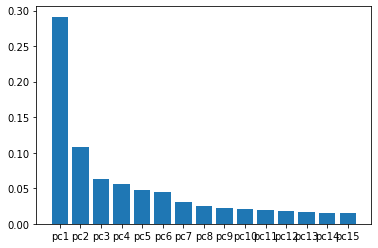

In [15]:
plt.bar(principalDf.columns, pca.explained_variance_ratio_)

In [16]:
sum(pca.explained_variance_ratio_[0:12])

0.7472019753772857

The first 12 PCs account for 75% of the variance. 

In [17]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])

In [18]:
principalDf['genre'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre
song_id,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,0.359589,0.413392,-0.246819,0.304727,0.145401,-0.288937,-0.035383,0.022705,-0.285956,0.065697,-0.052546,0.139977,blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-0.112710,0.001525,-0.166935,-0.586511,0.068103,-0.077461,0.124700,-0.099575,-0.414492,-0.169700,-0.002275,0.074681,blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-0.404665,-0.684191,0.236768,-0.165815,-0.140385,-0.144135,-0.049905,0.200018,-0.041241,-0.167736,0.209054,0.042943,blues
6d12adc4a57955aea80caa0f6b81b71c6301788e,0.346818,0.092091,-0.233798,-0.327215,0.627950,-0.460871,-0.232589,-0.093122,-0.186539,0.000972,-0.129885,0.078319,blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-0.336195,-0.209358,0.121133,-0.302237,0.289160,-0.382399,-0.313776,-0.227850,0.036446,-0.097872,-0.127137,0.095181,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407e4a536923a0eefcb36e7f9a7d44f837a539,-0.314121,0.592348,-0.319194,-0.334222,-0.224446,-0.228287,0.552146,0.229600,-0.216725,-0.025337,-0.072802,0.338451,alternative
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7,-0.837088,-0.635472,-0.313775,0.230368,0.129470,-0.441317,0.071533,-0.101405,0.306500,0.165454,-0.330079,-0.112965,alternative
33d70c1587b645ab1490c24cbca603cfd1d8262a,-0.699344,0.240222,-0.436061,-0.065309,0.063828,0.046215,0.140433,-0.492963,0.103992,0.026619,0.227244,0.027225,alternative


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

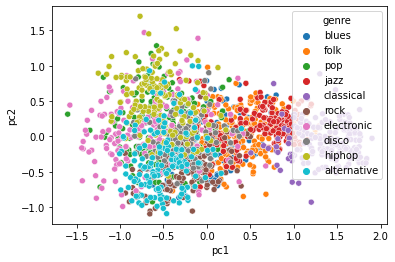

In [19]:
# 2 dimensions
sns.scatterplot(data=principalDf, x='pc1', y='pc2', hue='genre')

In [20]:
# 3 dimensions
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='genre')
fig.write_html("pca_scatter3d.html")
# view the plot in safari

## Add Encoded Label

In [21]:
le = LabelEncoder()
principalDf['multiclass_label'] = le.fit_transform(principalDf['genre'])

In [22]:
encoded_classes = {}
for i, idx in zip(range(len(le.classes_)), list(le.classes_)):
    encoded_classes[idx] = i    
encoded_classes

{'alternative': 0,
 'blues': 1,
 'classical': 2,
 'disco': 3,
 'electronic': 4,
 'folk': 5,
 'hiphop': 6,
 'jazz': 7,
 'pop': 8,
 'rock': 9}

In [23]:
principalDf.groupby('genre')['multiclass_label'].value_counts()

genre        multiclass_label
alternative  0                   144
blues        1                   125
classical    2                   166
disco        3                   118
electronic   4                   174
folk         5                   223
hiphop       6                   153
jazz         7                   188
pop          8                   173
rock         9                   140
Name: multiclass_label, dtype: int64

In [24]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre,multiclass_label
song_id,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,0.359589,0.413392,-0.246819,0.304727,0.145401,-0.288937,-0.035383,0.022705,-0.285956,0.065697,-0.052546,0.139977,blues,1
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-0.112710,0.001525,-0.166935,-0.586511,0.068103,-0.077461,0.124700,-0.099575,-0.414492,-0.169700,-0.002275,0.074681,blues,1
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-0.404665,-0.684191,0.236768,-0.165815,-0.140385,-0.144135,-0.049905,0.200018,-0.041241,-0.167736,0.209054,0.042943,blues,1
6d12adc4a57955aea80caa0f6b81b71c6301788e,0.346818,0.092091,-0.233798,-0.327215,0.627950,-0.460871,-0.232589,-0.093122,-0.186539,0.000972,-0.129885,0.078319,blues,1
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-0.336195,-0.209358,0.121133,-0.302237,0.289160,-0.382399,-0.313776,-0.227850,0.036446,-0.097872,-0.127137,0.095181,blues,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407e4a536923a0eefcb36e7f9a7d44f837a539,-0.314121,0.592348,-0.319194,-0.334222,-0.224446,-0.228287,0.552146,0.229600,-0.216725,-0.025337,-0.072802,0.338451,alternative,0
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7,-0.837088,-0.635472,-0.313775,0.230368,0.129470,-0.441317,0.071533,-0.101405,0.306500,0.165454,-0.330079,-0.112965,alternative,0
33d70c1587b645ab1490c24cbca603cfd1d8262a,-0.699344,0.240222,-0.436061,-0.065309,0.063828,0.046215,0.140433,-0.492963,0.103992,0.026619,0.227244,0.027225,alternative,0


In [25]:
principalDf.to_csv('preprocessed_PC_data.csv', index=False)

## Train Test Split

In [26]:
X = principalDf.drop(['genre', 'multiclass_label'], axis=1)
y = principalDf['multiclass_label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=5)

## SVM

In [43]:
model_svm = SVC(gamma='auto')
model_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [46]:
preds_svm = model_svm.predict(X_test, )

In [47]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(preds_svm)))

              precision    recall  f1-score   support

 alternative       0.52      0.60      0.56        48
       blues       0.22      0.05      0.08        41
   classical       0.88      0.95      0.91        55
       disco       0.53      0.62      0.57        39
  electronic       0.51      0.40      0.45        57
        folk       0.46      0.84      0.59        74
      hiphop       0.55      0.57      0.56        51
        jazz       0.82      0.60      0.69        62
         pop       0.44      0.33      0.38        57
        rock       0.62      0.54      0.58        46

    accuracy                           0.57       530
   macro avg       0.56      0.55      0.54       530
weighted avg       0.56      0.57      0.55       530



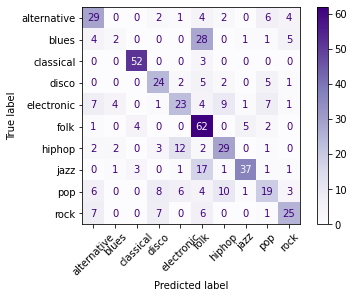

In [48]:
class_names = le.classes_

cnf_matrix = confusion_matrix(y_test, preds_svm)
plot_confusion_matrix(model_svm, X_test, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)